# <font color=green>ADD-Net: An Effective Deep Learning Model for Early Detection of Alzheimer’s Diseases in MRI Scans</font>

### **<font color=purple> packages that need to install to run this code </font>**
- pip install <font color=red>**tensrflow**</font> || in case of GPU use pip install <font color=red>**tensrflow-gpu**</font>
- pip install <font color=red>**imblearn**</font>
- pip install <font color=red>**tensorflow-addons**</font>
- pip install <font color=red>**matplotlib**</font>
- pip install <font color=red>**seaborn**</font>
- pip install <font color=red>**keras**</font>
- pip install <font color=red>**scikit-learn**</font>

### **Dataset [Link](https://www.kaggle.com/datasets/shahidzikria/alz-dataset)**
#### File modified to run on colab
##### **Follow the below instructions**
- Instructions to add dataset in colab from kaggle [Link](https://www.kaggle.com/general/74235)
- download dataset in your current directory or another and carefully add path in the **WORKING_DIRECTORY** variable

In [1]:
import zipfile
with zipfile.ZipFile('toZip.zip', 'r') as zip_ref:
  zip_ref.extractall('newimages')

In [2]:
!pip install tensorflow==2.2.0-rc3
!pip install keras
!pip install imblearn
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn
!pip install tensorflow-addons==0.8.3

ERROR: Could not find a version that satisfies the requirement tensorflow==2.2.0-rc3 (from versions: 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.11.1, 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.13.1, 2.14.0rc0, 2.14.0rc1, 2.14.0, 2.14.1, 2.15.0rc0, 2.15.0rc1, 2.15.0, 2.15.0.post1, 2.15.1, 2.16.0rc0, 2.16.1)
ERROR: No matching distribution found for tensorflow==2.2.0-rc3
ERROR: Could not find a version that satisfies the requirement tensorflow-addons==0.8.3 (from versions: 0.16.1, 0.17.0, 0.17.1, 0.18.0, 0.19.0, 0.20.0, 0.21.0, 0.22.0, 0.23.0)
ERROR: No matching distribution found for tensorflow-addons==0.8.3


### <font color=orange> Importing Libraries </font>

In [3]:
import numpy as np
import random

#   Plotting
import seaborn as sns
import matplotlib.pyplot as plt


#   DataGenerator to read images and rescale images
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import tensorflow as tf

#   count each class samples
from collections import Counter

#   callbacks
from tensorflow.keras.callbacks import ReduceLROnPlateau

#   evaluate precison recall and f1-score of each class of model
from sklearn.metrics import classification_report
#   Show performance of a classification model
from sklearn.metrics import confusion_matrix

#   Different layers
from keras.models import Sequential
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import ReLU
from tensorflow.keras.layers import Softmax

# split dataset to train, validation and test set
from sklearn.model_selection import train_test_split

#   callbacks
from keras import callbacks

#   SMOTETomek from imblance library
from imblearn.combine import SMOTETomek, SMOTEENN

#   Optimizer
from tensorflow.keras.optimizers import SGD

from sklearn.metrics import roc_curve, auc
from itertools import cycle

### <font color=orange> Define directory of dataset & Classes names </font>

In [4]:
## Set Path Here before running the code
WORKING_DIRECTORY =  r"newimages/dataset"

##  Name of classes
CLASSES = ['Mild-Demented',
           'Moderate-Demented',
           'Non-Demented',
           'VeryMild-Demented']

### <font color=orange> Load Images, Rescale Images, and seperate from data generator & Label One Hot encoding </font>

In [5]:
X, y = [], []

## Images rescaling
datagen = ImageDataGenerator(rescale=1.0/255.0)

#   Load images by resizing and shuffling randomly
train_dataset = datagen.flow_from_directory(WORKING_DIRECTORY, target_size=(176, 208),batch_size=6400, shuffle=True)

### Seperate Dataset from  Data Genrator
X, y = train_dataset.next()

Found 6400 images belonging to 4 classes.


SMOTETOMEK ALGO

In [ ]:
#   reshaping the images to 1D
X = X.reshape(-1, 176 * 208 * 3)

#   Oversampling method to remove imbalance class problem
X, y = SMOTEENN().fit_resample(X, y)

#   reshape images to images size of 208, 176, 3
X = X.reshape(-1, 176, 208, 3)

### <font color=orange> Splitting dataset for Training, Validation & Testing </font>

In [ ]:
import joblib

#   20% split to validation and 80% split to train set
X_train, x_val, y_train, y_val = train_test_split(X,y, test_size = 0.2)
joblib.dump((X_train, x_val, y_train, y_val), 'split1-tomek.pkl')


#   20% split to test from 80% of train and 60% remains in train set
X_train, x_test, y_train, y_test = train_test_split(X_train,y_train, test_size = 0.2)
joblib.dump((X_train, x_val, y_train, y_val), 'split2-tomek.pkl')
# #   20% split to validation and 80% split to train set
# X_train, x_val, y_train, y_val = train_test_split(X,y, test_size = 0.2)

# #   20% split to test from 80% of train and 60% remains in train set
# X_train, x_test, y_train, y_test = train_test_split(X_train,y_train, test_size = 0.2)

# # Number of samples after train test split
# print("Number of samples after splitting into Training, validation & test set\n")

# print("Train     \t",sorted(Counter(np.argmax(y_train, axis=1)).items()))
# print("Validation\t",sorted(Counter(np.argmax(y_val, axis=1)).items()))
# print("Test      \t",sorted(Counter(np.argmax(y_test, axis=1)).items()))

Number of samples after splitting into Training, validation & test set

Train     	 [(0, 2035), (1, 2055), (2, 2019), (3, 2083)]
Validation	 [(0, 638), (1, 633), (2, 648), (3, 641)]
Test      	 [(0, 527), (1, 512), (2, 533), (3, 476)]


In [ ]:
#   to free memeory we don't need this one as we split our data
del X, y

In [ ]:
from keras import initializers
from tensorflow.keras.applications import InceptionResNetV2, DenseNet169, VGG19

### <font color=orange> Model Architecture </font>

In [ ]:
init = initializers.GlorotUniform()

model = Sequential()

model.add(Input(shape=(176, 208, 3)))

model.add(Convolution2D(16, 5, kernel_initializer=init))
model.add(ReLU())
model.add(AveragePooling2D(pool_size=(2,2)))

model.add(Convolution2D(32, 5, kernel_initializer=init))
model.add(ReLU())
model.add(AveragePooling2D(pool_size=(2,2)))

model.add(Convolution2D(64, 5, kernel_initializer=init))
model.add(ReLU())
model.add(AveragePooling2D(pool_size=(2,2)))

model.add(Convolution2D(128, 5, kernel_initializer=init))
model.add(ReLU())
model.add(AveragePooling2D(pool_size=(2,2)))


model.add(Dropout(0.01))

model.add(Flatten())

model.add(Dense(256, kernel_initializer=init))
model.add(ReLU())
model.add(Dropout(0.03))

model.add(Dense(4, kernel_initializer=init))
model.add(Softmax())

model.summary()

219055592/219055592 [==============================] - 11s 0us/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Funct  (None, 4, 5, 1536)        54336736  
 ional)                                                          
                                                                 
 dropout_2 (Dropout)         (None, 4, 5, 1536)        0         
                                                                 
 flatten_1 (Flatten)         (None, 30720)             0         
                                                                 
 dense_2 (Dense)             (None, 256)               7864576   
                                                                 
 re_lu_1 (ReLU)              (None, 256)               0         
                                                                 
 dropout_3 (Dropout)         (None, 256)            

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


### <font color=orange> Compiling the Model </font>

In [ ]:
### Model Compilation
model.compile(
    optimizer=SGD(learning_rate=0.01),
    loss = tf.keras.losses.CategoricalCrossentropy(name='loss'),
    metrics=[
        tf.keras.metrics.CategoricalAccuracy(name='acc'),
        tf.keras.metrics.AUC(name='auc'),
        # tf.keras.metrics.F1Score(name='f1_score'),
        tf.metrics.Precision(name="precision"),
        tf.metrics.Recall(name="recall") ])


### <font color=orange> Defining CALLBACKS to reduce Learning Rate </font>

In [ ]:
# callbacks used in model to perform well
rop_callback = ReduceLROnPlateau(monitor="val_loss", patience=2)

CALLBACKS = [rop_callback]

### <font color=orange> Training of the Model </font>

In [ ]:
#   declare to run on small gpu create batch sizes of images
valAug = ImageDataGenerator()

#   defining batch size
batch_size = 8

history = model.fit(valAug.flow(X_train, y_train, batch_size=batch_size, shuffle = True),
steps_per_epoch= (len(X_train) // batch_size),
validation_data=valAug.flow(x_val, y_val, batch_size=batch_size, shuffle = True),
validation_steps= (len(x_test) // batch_size),
epochs= 40,
batch_size=batch_size,
callbacks = CALLBACKS
)

Epoch 1/40
1024/1024 [==============================] - 160s 111ms/step - loss: 0.6317 - acc: 0.7157 - auc: 0.9277 - precision: 0.7802 - recall: 0.6349 - val_loss: 0.2953 - val_acc: 0.8628 - val_auc: 0.9835 - val_precision: 0.8673 - val_recall: 0.8618 - lr: 0.0100
Epoch 2/40
1024/1024 [==============================] - 110s 108ms/step - loss: 0.2492 - acc: 0.8970 - auc: 0.9880 - precision: 0.9022 - recall: 0.8899 - val_loss: 0.2616 - val_acc: 0.9204 - val_auc: 0.9848 - val_precision: 0.9249 - val_recall: 0.9141 - lr: 0.0100
Epoch 3/40
1024/1024 [==============================] - 110s 107ms/step - loss: 0.0799 - acc: 0.9717 - auc: 0.9985 - precision: 0.9728 - recall: 0.9707 - val_loss: 0.2425 - val_acc: 0.9102 - val_auc: 0.9889 - val_precision: 0.9132 - val_recall: 0.9097 - lr: 0.0100
Epoch 4/40
1024/1024 [==============================] - 110s 108ms/step - loss: 0.0415 - acc: 0.9857 - auc: 0.9993 - precision: 0.9862 - recall: 0.9852 - val_loss: 0.1040 - val_acc: 0.9639 - val_auc: 0.997

### <font color=orange> Evaluation of Model with the Test data </font>

In [ ]:
### Evaluate Model
test_scores = model.evaluate(x_test, y_test, batch_size = 32)


print("\n\nTesting Loss : \t\t {0:0.6f}".format(test_scores[0] ))
print("Testing Accuracy : \t {0:0.6f} %".format(test_scores[1] * 100))
print("Testing AC : \t\t {0:0.6f} %".format(test_scores[2] * 100))
print("Testing Precision : \t {0:0.6f} %".format(test_scores[3] * 100))
print("Testing Recall : \t {0:0.6f} %".format(test_scores[4] * 100))

64/64 [==============================] - 3s 34ms/step - loss: 0.0269 - acc: 0.9937 - auc: 0.9990 - precision: 0.9937 - recall: 0.9937


Testing Loss : 		 0.026883
Testing Accuracy : 	 99.365234 %
Testing AC : 		 99.897748 %
Testing Precision : 	 99.365234 %
Testing Recall : 	 99.365234 %


### <font color=orange> Model Training graphs </font>
- Accuracy
- Loss
- AUC
- Precision
- Recall

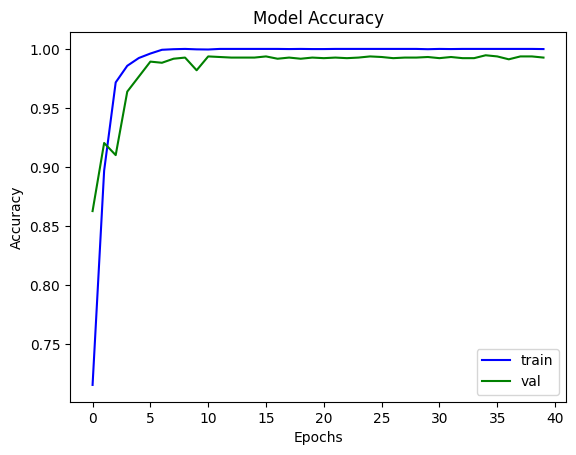

In [ ]:
plt.plot(history.history['acc'], 'b')
plt.plot(history.history['val_acc'], 'g')
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["train", "val"])
plt.show()

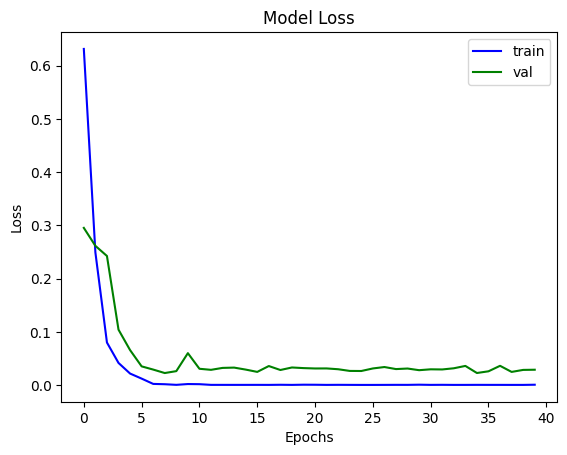

In [ ]:
plt.plot(history.history['loss'], 'b')
plt.plot(history.history['val_loss'], 'g')
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["train", "val"])
plt.show()

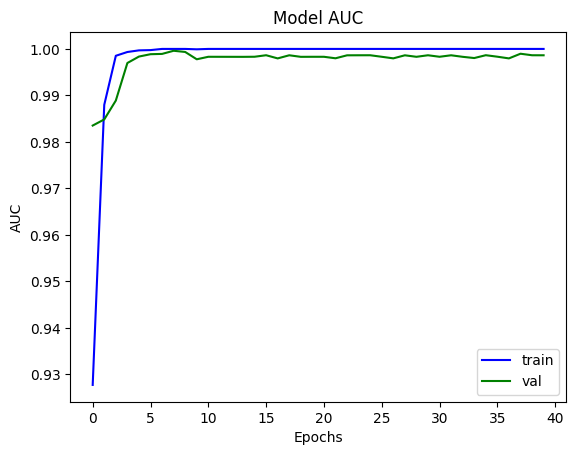

In [ ]:
plt.plot(history.history['auc'], 'b')
plt.plot(history.history['val_auc'], 'g')
plt.title("Model AUC")
plt.xlabel("Epochs")
plt.ylabel("AUC")
plt.legend(["train", "val"])
plt.show()

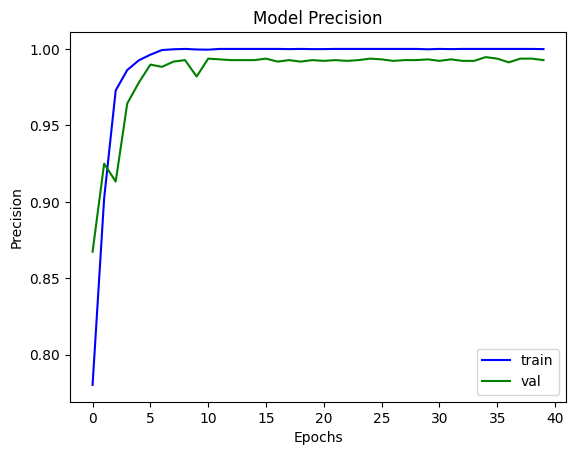

In [ ]:
plt.plot(history.history['precision'], 'b')
plt.plot(history.history['val_precision'], 'g')
plt.title("Model Precision")
plt.xlabel("Epochs")
plt.ylabel("Precision")
plt.legend(["train", "val"])
plt.show()

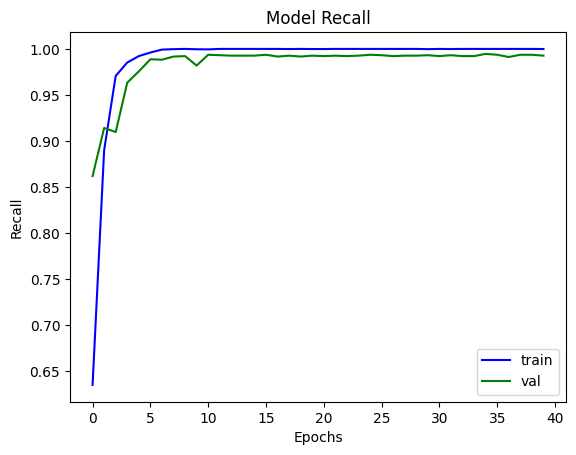

In [ ]:
plt.plot(history.history['recall'], 'b')
plt.plot(history.history['val_recall'], 'g')
plt.title("Model Recall")
plt.xlabel("Epochs")
plt.ylabel("Recall")
plt.legend(["train", "val"])
plt.show()

### <font color=orange> Test set Evaluation </font>
- Classification Report
- Confusion Matrix
- ROC Curve
- Extension ROC Multiclass

In [ ]:
pred_labels = model.predict(x_test, batch_size=32)

def roundoff(arr):
    arr[np.argwhere(arr != arr.max())] = 0
    arr[np.argwhere(arr == arr.max())] = 1
    return arr

for labels in pred_labels:
    labels = roundoff(labels)

print(classification_report(y_test, pred_labels, target_names=CLASSES))


64/64 [==============================] - 5s 32ms/step
                   precision    recall  f1-score   support

    Mild-Demented       0.99      1.00      1.00       527
Moderate-Demented       1.00      1.00      1.00       512
     Non-Demented       1.00      0.98      0.99       533
VeryMild-Demented       0.99      0.99      0.99       476

        micro avg       0.99      0.99      0.99      2048
        macro avg       0.99      0.99      0.99      2048
     weighted avg       0.99      0.99      0.99      2048
      samples avg       0.99      0.99      0.99      2048



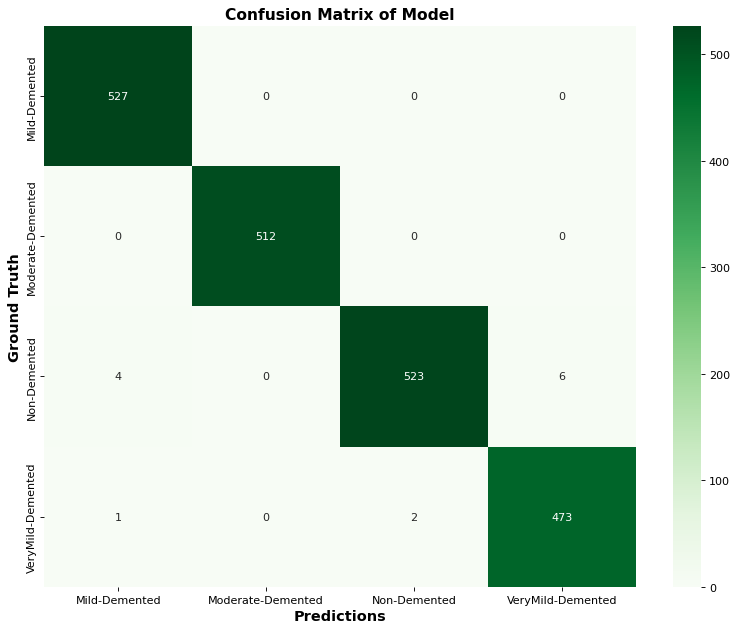

In [ ]:
pred_ls = np.argmax(pred_labels, axis=1)
test_ls = np.argmax(y_test, axis=1)

conf_arr = confusion_matrix(test_ls, pred_ls)

plt.figure(figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

ax = sns.heatmap(conf_arr, cmap='Greens', annot=True, fmt='d', xticklabels= CLASSES, yticklabels=CLASSES)

plt.title('Confusion Matrix of Model', fontweight='bold', fontsize=14.0)
plt.xlabel('Predictions', fontweight='bold', fontsize=13)
plt.ylabel('Ground Truth', fontweight='bold', fontsize=13)
plt.tight_layout()
plt.show(ax)

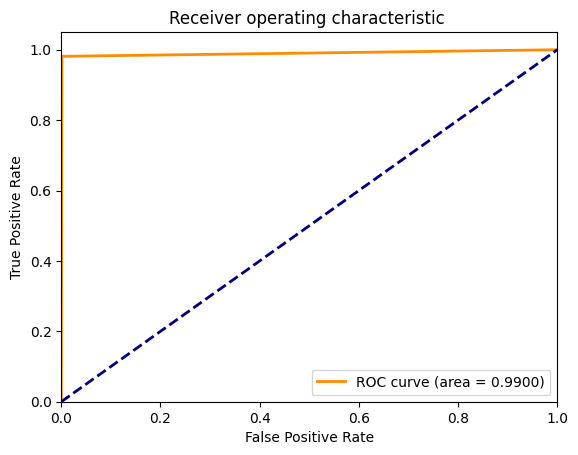

In [ ]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], pred_labels[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), pred_labels.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
lw = 2
plt.plot(
    fpr[2],
    tpr[2],
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.4f)" % roc_auc[2])

plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic ")
plt.legend(loc="lower right")
plt.show()

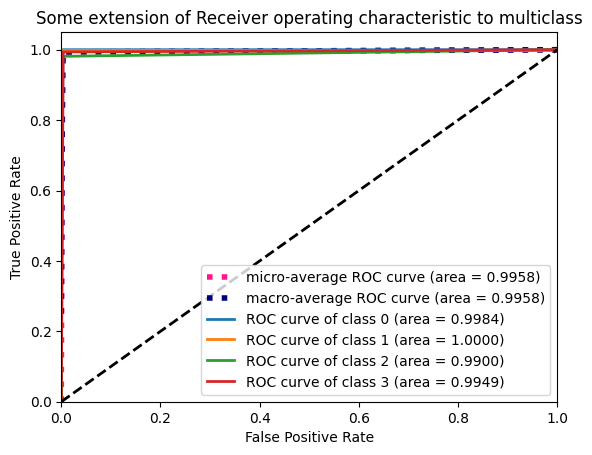

In [ ]:
n_classes = 4
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.4f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.4f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

for i in range(n_classes):
    plt.plot(
        fpr[i],
        tpr[i],
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.4f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Some extension of Receiver operating characteristic to multiclass")
plt.legend(loc="lower right")
plt.show()

### <font color=orange> Saving Model for Future Use </font>

In [ ]:
#    To save the model in the current directory
model.save("vgg19+smote.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
